In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
print(df)

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                    14                  41               0               11   
1                     2                  30               0               12   
2                     5                  66               0               22   
3                     3                  63               0                8   
4                     5                  40               0                6   
...                 ...                 ...             ...              ...   
24995                 2                  85               0               12   
24996                 5                  35               2               15   
24997                 3                  10               1               23   
24998                 8                  69               3               41   
24999                 3                  48               1               17   

       number_outpatient  number_emerge

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   time_in_hospital                          25000 non-null  int64
 1   num_lab_procedures                        25000 non-null  int64
 2   num_procedures                            25000 non-null  int64
 3   num_medications                           25000 non-null  int64
 4   number_outpatient                         25000 non-null  int64
 5   number_emergency                          25000 non-null  int64
 6   number_inpatient                          25000 non-null  int64
 7   number_diagnoses                          25000 non-null  int64
 8   race_Caucasian                            25000 non-null  bool 
 9   race_AfricanAmerican                      25000 non-null  bool 
 10  gender_Female                             25000 non-null  

In [ ]:
# Convert categorical boolean columns to binary (0 and 1)
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   time_in_hospital                          25000 non-null  int64
 1   num_lab_procedures                        25000 non-null  int64
 2   num_procedures                            25000 non-null  int64
 3   num_medications                           25000 non-null  int64
 4   number_outpatient                         25000 non-null  int64
 5   number_emergency                          25000 non-null  int64
 6   number_inpatient                          25000 non-null  int64
 7   number_diagnoses                          25000 non-null  int64
 8   race_Caucasian                            25000 non-null  int64
 9   race_AfricanAmerican                      25000 non-null  int64
 10  gender_Female                             25000 non-null  

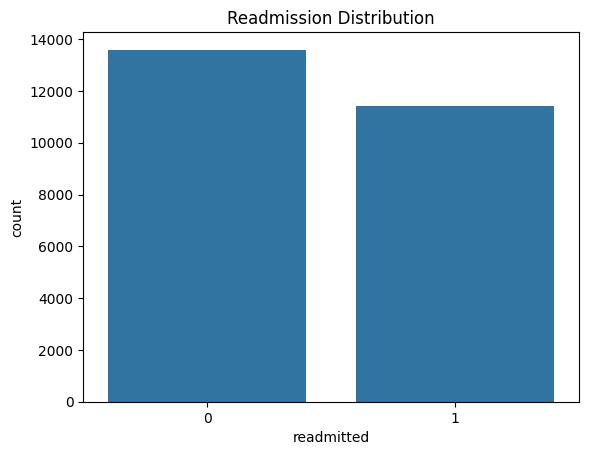

In [ ]:
# Plot distribution of readmitted patients
sns.countplot(x='readmitted', data=df)
plt.title('Readmission Distribution')
plt.show()

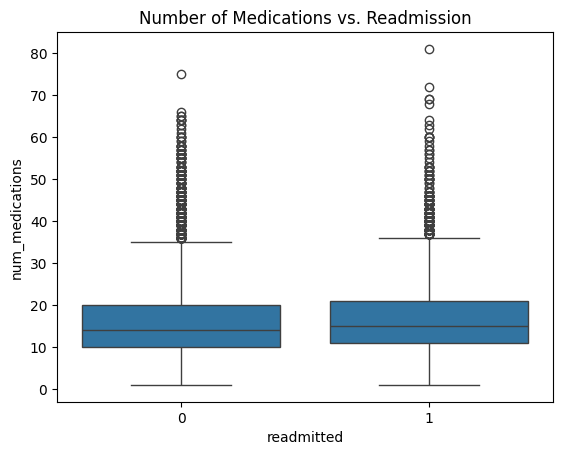

In [ ]:
# Compare number of medications for readmitted vs. non-readmitted patients
sns.boxplot(x='readmitted', y='num_medications', data=df)
plt.title('Number of Medications vs. Readmission')
plt.show()

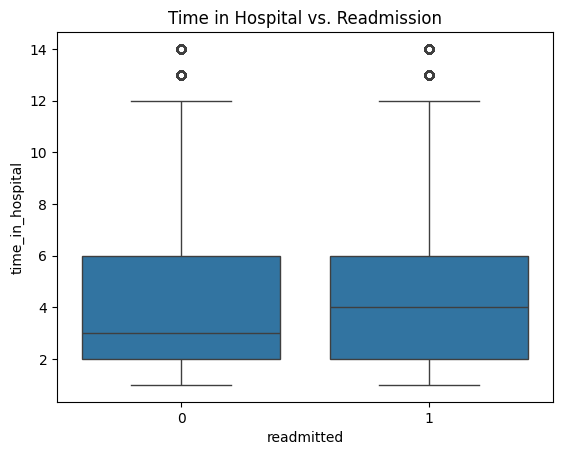

In [ ]:
# Compare hospital stays (time_in_hospital) for readmitted vs. non-readmitted patients
sns.boxplot(x='readmitted', y='time_in_hospital', data=df)
plt.title('Time in Hospital vs. Readmission')
plt.show()

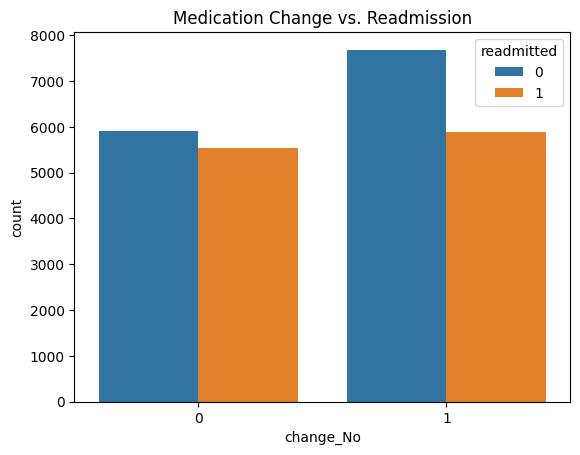

In [ ]:
# Compare number of medications and readmission based on medication change
sns.countplot(x='change_No', hue='readmitted', data=df)
plt.title('Medication Change vs. Readmission')
plt.show()

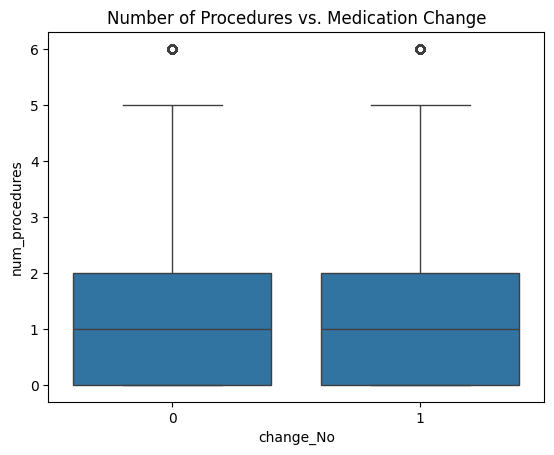

In [ ]:
# Compare number of procedures for patients with or without medication changes
sns.boxplot(x='change_No', y='num_procedures', data=df)
plt.title('Number of Procedures vs. Medication Change')
plt.show()

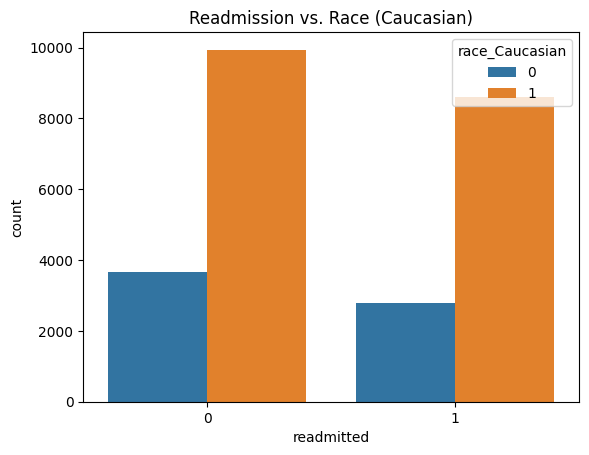

In [ ]:
# Compare readmission rates for Caucasian and African American patients
sns.countplot(x='readmitted', hue='race_Caucasian', data=df)
plt.title('Readmission vs. Race (Caucasian)')
plt.show()

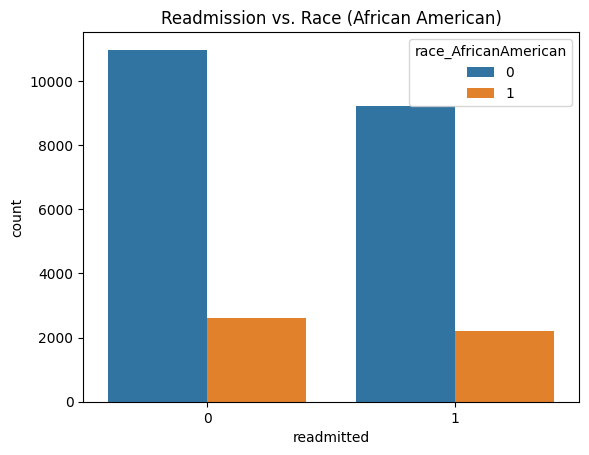

In [ ]:
sns.countplot(x='readmitted', hue='race_AfricanAmerican', data=df)
plt.title('Readmission vs. Race (African American)')
plt.show()

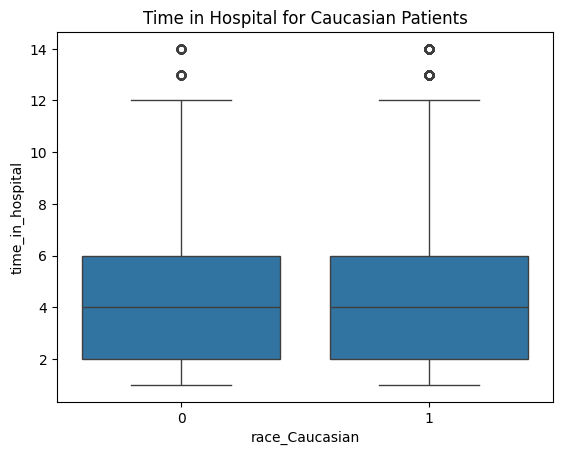

In [ ]:
# Compare time in hospital based on race
sns.boxplot(x='race_Caucasian', y='time_in_hospital', data=df)
plt.title('Time in Hospital for Caucasian Patients')
plt.show()

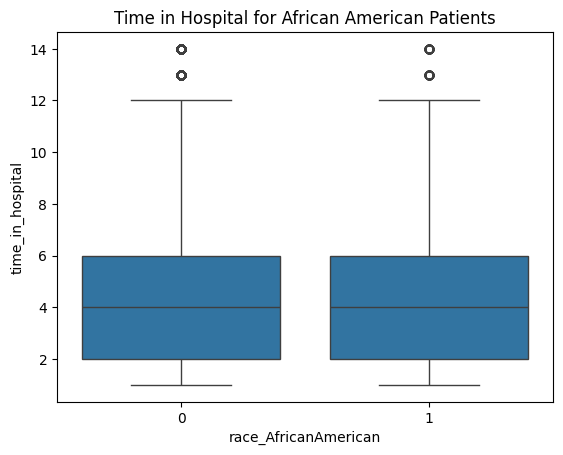

In [ ]:
sns.boxplot(x='race_AfricanAmerican', y='time_in_hospital', data=df)
plt.title('Time in Hospital for African American Patients')
plt.show()

Top Correlated Features with 'readmitted':
 readmitted            1.000000
number_inpatient      0.216490
number_diagnoses      0.123423
number_emergency      0.100618
number_outpatient     0.087092
diag_1_428            0.070162
diabetesMed_Yes       0.059868
time_in_hospital      0.057583
num_medications       0.056378
num_lab_procedures    0.040087
Name: readmitted, dtype: float64

Least Correlated Features with 'readmitted':
 num_procedures               -0.049950
change_No                    -0.050143
diag_3_401                   -0.050940
diag_3_250                   -0.055564
diag_2_250                   -0.066722
acetohexamide_No                   NaN
examide_No                         NaN
citoglipton_No                     NaN
metformin-rosiglitazone_No         NaN
metformin-pioglitazone_No          NaN
Name: readmitted, dtype: float64


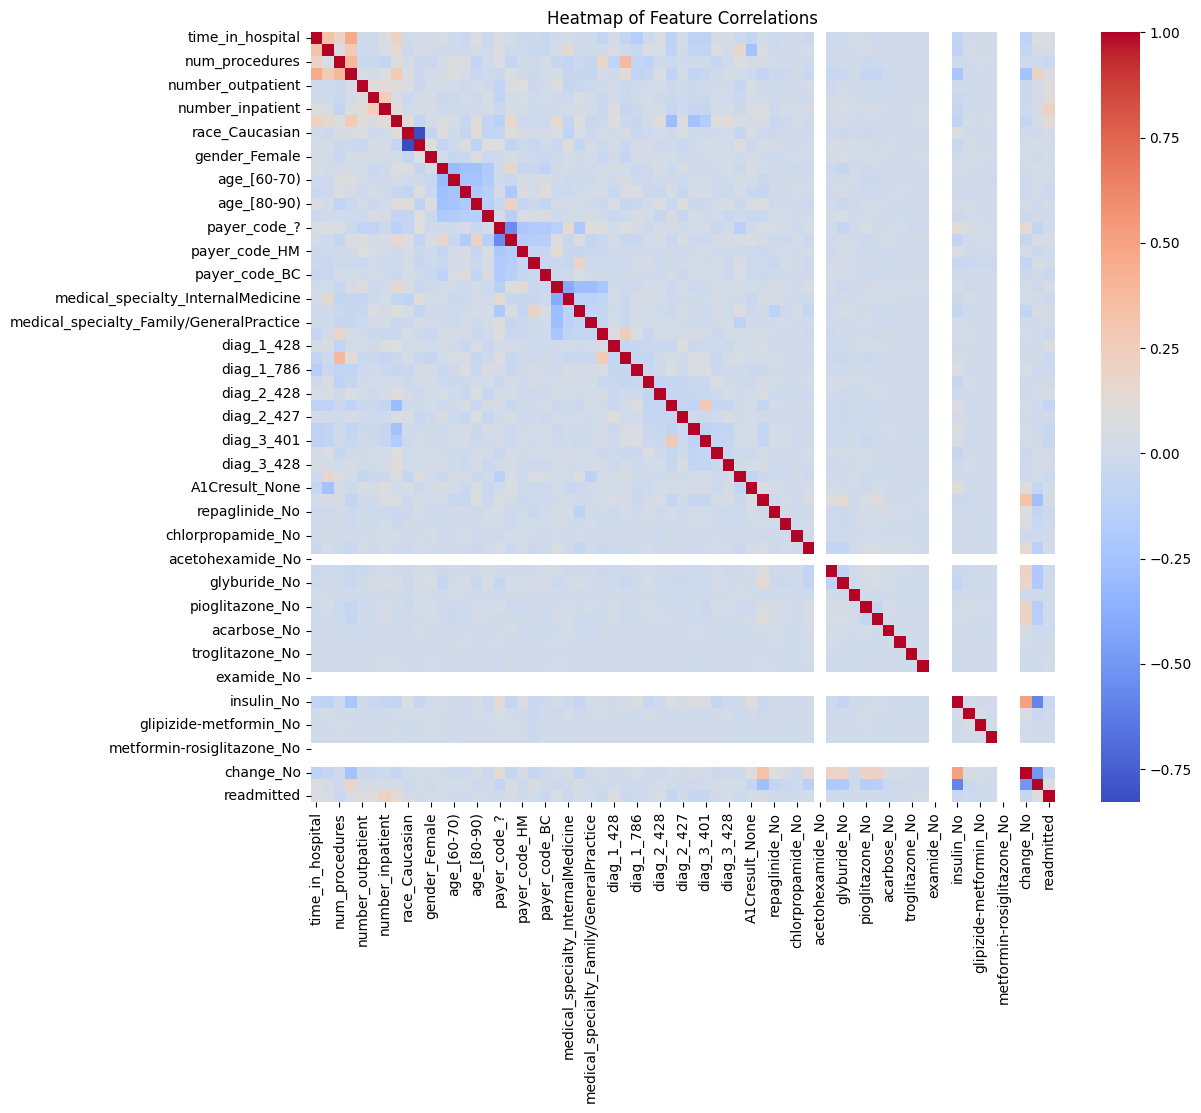

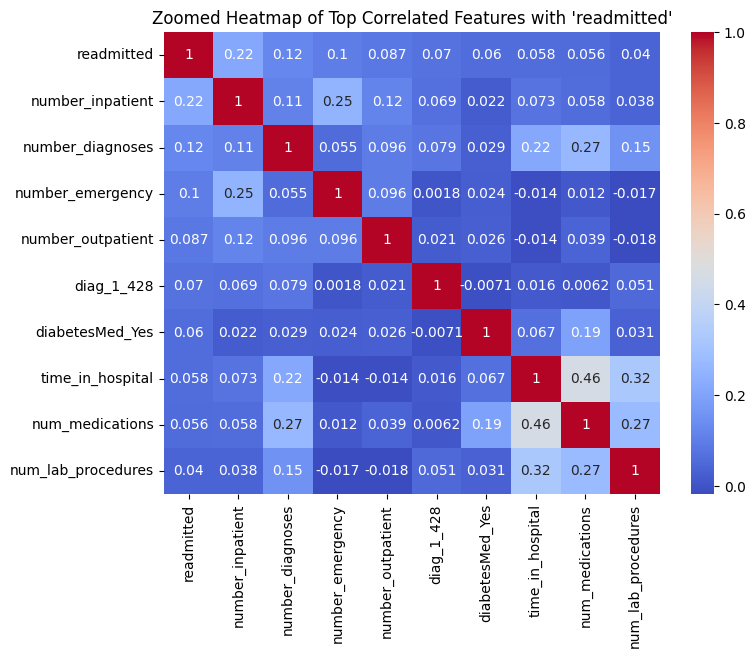

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations with the target variable 'readmitted'
correlations = df.corr()

# Extract correlations of all features with 'readmitted'
target_corr = correlations['readmitted'].sort_values(ascending=False)

# Print correlations with 'readmitted'
print("Top Correlated Features with 'readmitted':\n", target_corr.head(10))
print("\nLeast Correlated Features with 'readmitted':\n", target_corr.tail(10))

# Plot a heatmap of all correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=False, cmap='coolwarm', cbar=True)
plt.title("Heatmap of Feature Correlations")
plt.show()

# Optional: Zoom in on the most correlated features with 'readmitted'
plt.figure(figsize=(8, 6))
most_corr_features = correlations[['readmitted']].sort_values(by='readmitted', ascending=False).head(10).index
sns.heatmap(df[most_corr_features].corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title("Zoomed Heatmap of Top Correlated Features with 'readmitted'")
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter for features most correlated with 'readmitted'
threshold = 0.05  # Define a threshold for significant correlations
significant_corr = correlations['readmitted'][correlations['readmitted'].abs() > threshold].sort_values(ascending=False)

# Print significant correlations
print("Features with significant correlation to 'readmitted':\n", significant_corr)

Features with significant correlation to 'readmitted':
 readmitted           1.000000
number_inpatient     0.216490
number_diagnoses     0.123423
number_emergency     0.100618
number_outpatient    0.087092
diag_1_428           0.070162
diabetesMed_Yes      0.059868
time_in_hospital     0.057583
num_medications      0.056378
change_No           -0.050143
diag_3_401          -0.050940
diag_3_250          -0.055564
diag_2_250          -0.066722
Name: readmitted, dtype: float64


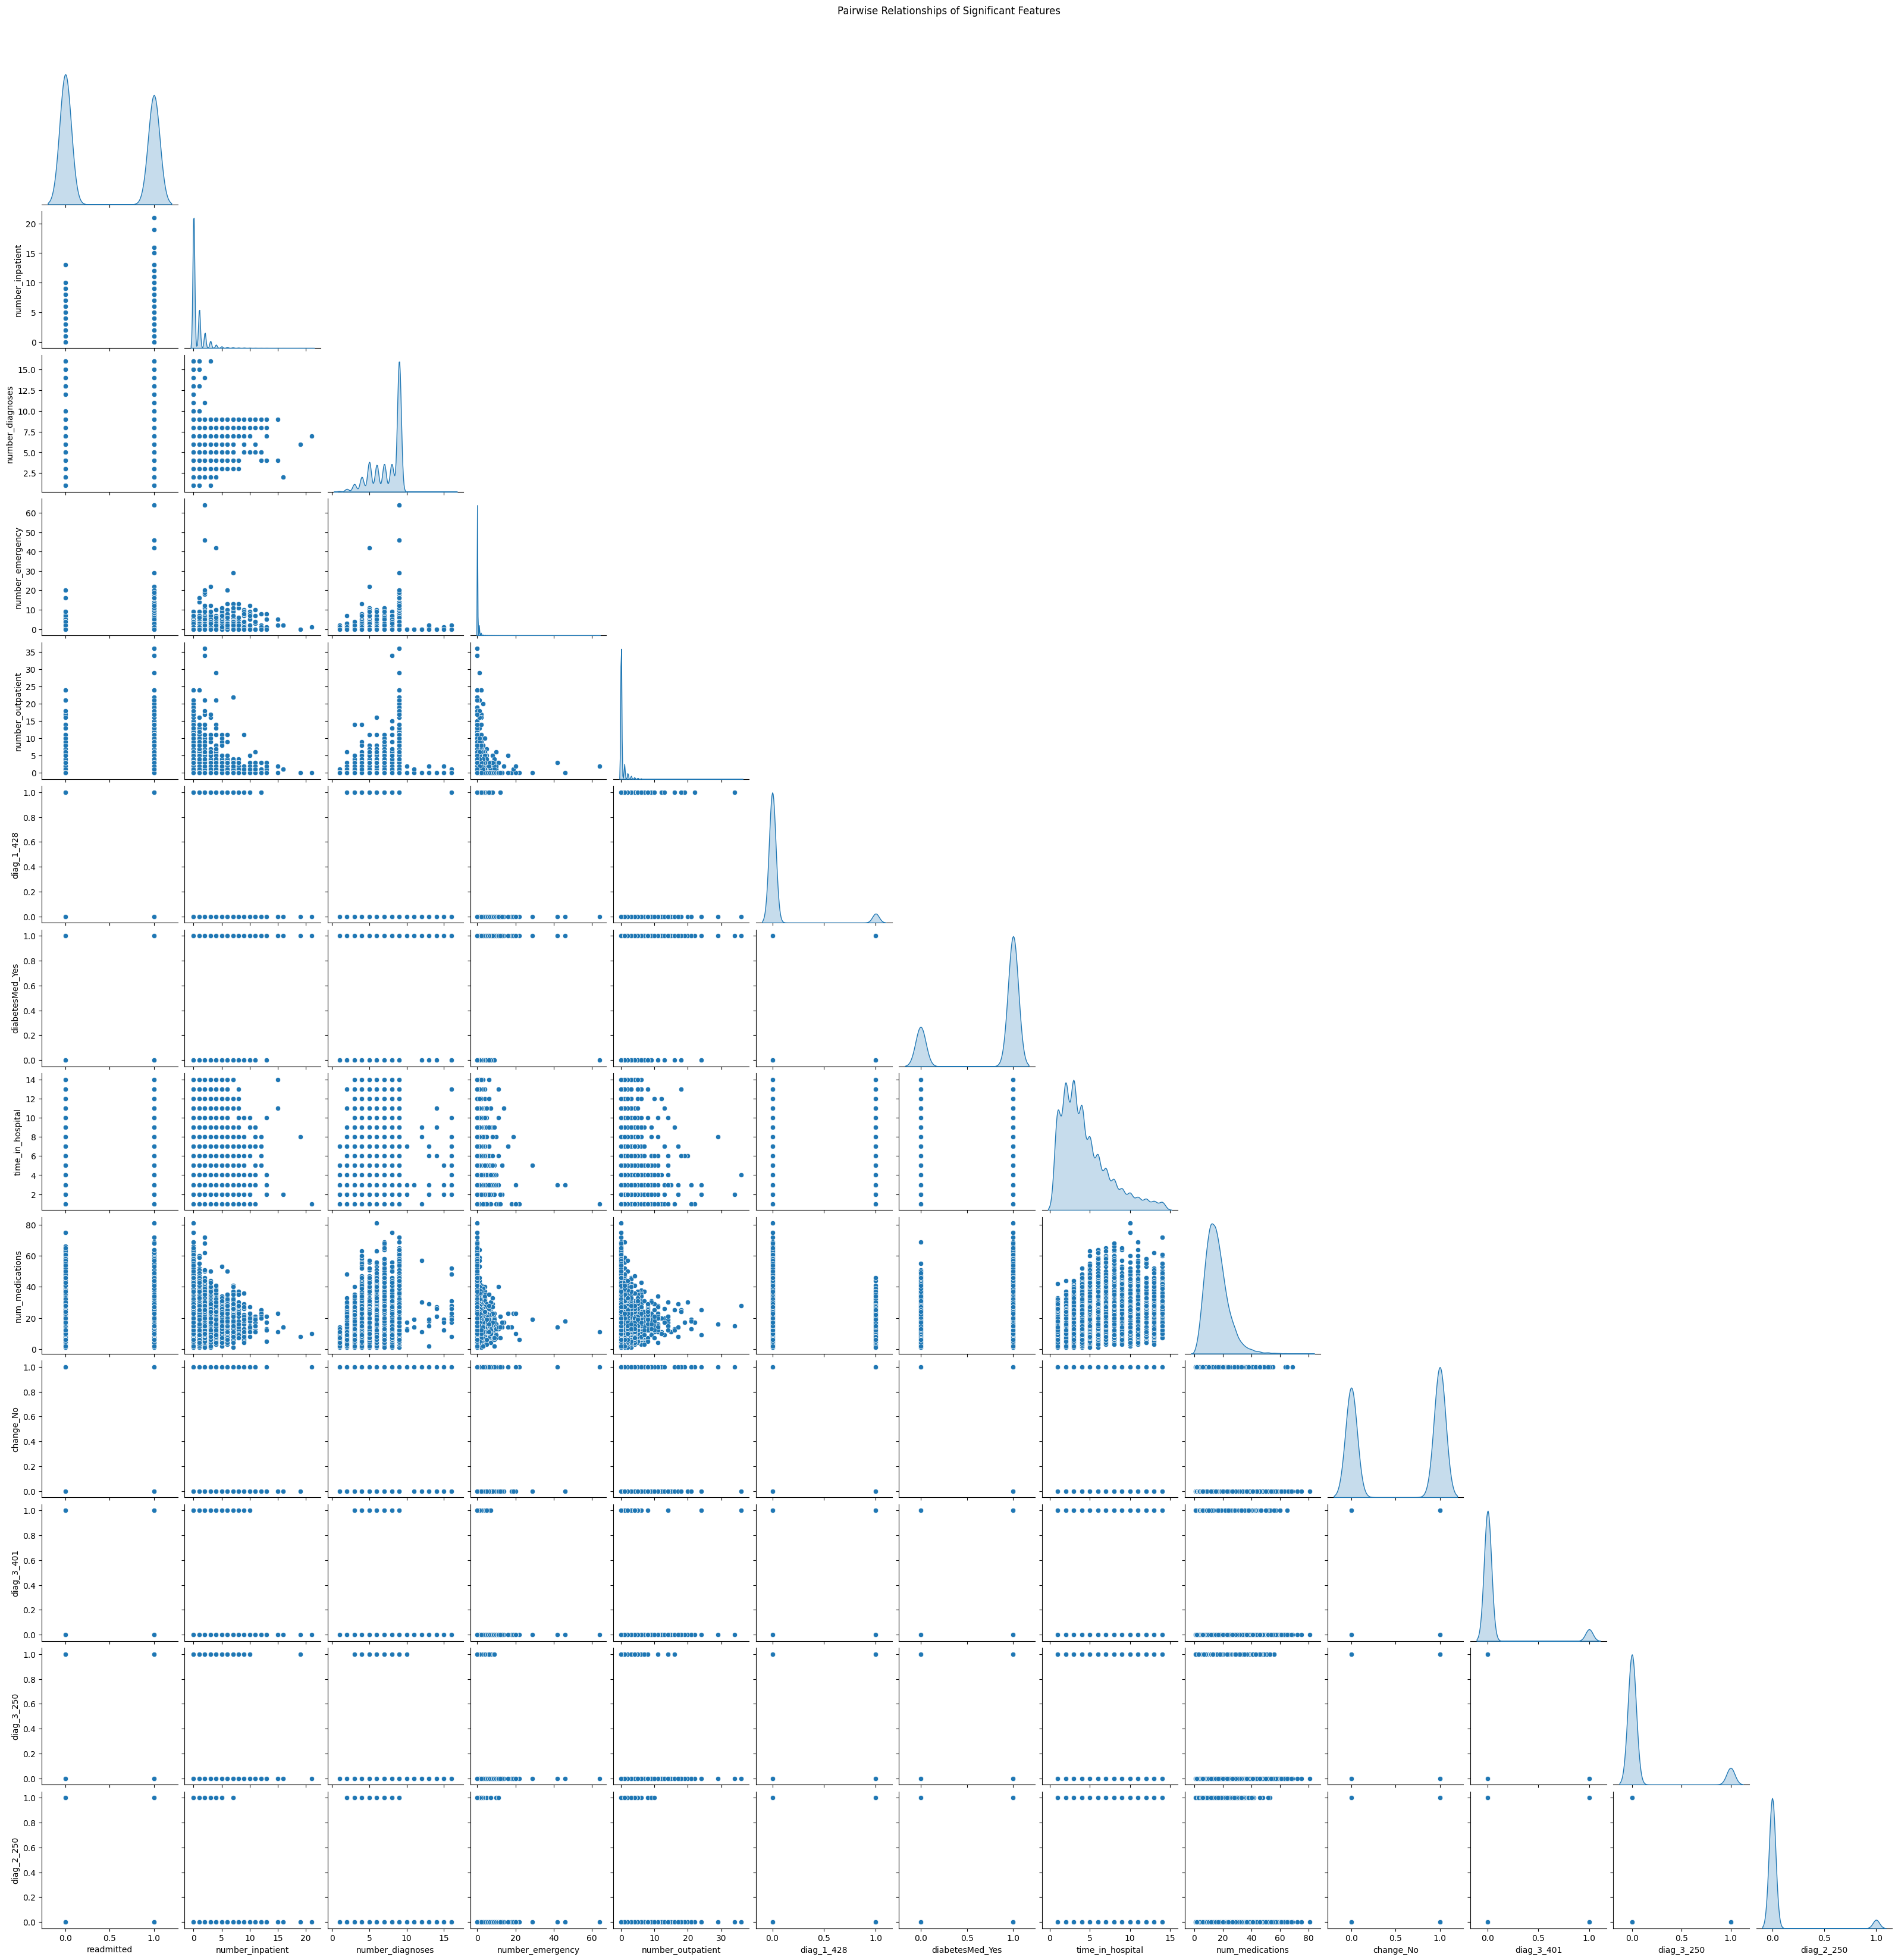

In [ ]:
# 2. Pairplot: Analyze pairwise relationships between significant features
important_features = significant_corr.index
sns.pairplot(df[important_features], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships of Significant Features", y=1.02)
plt.show()

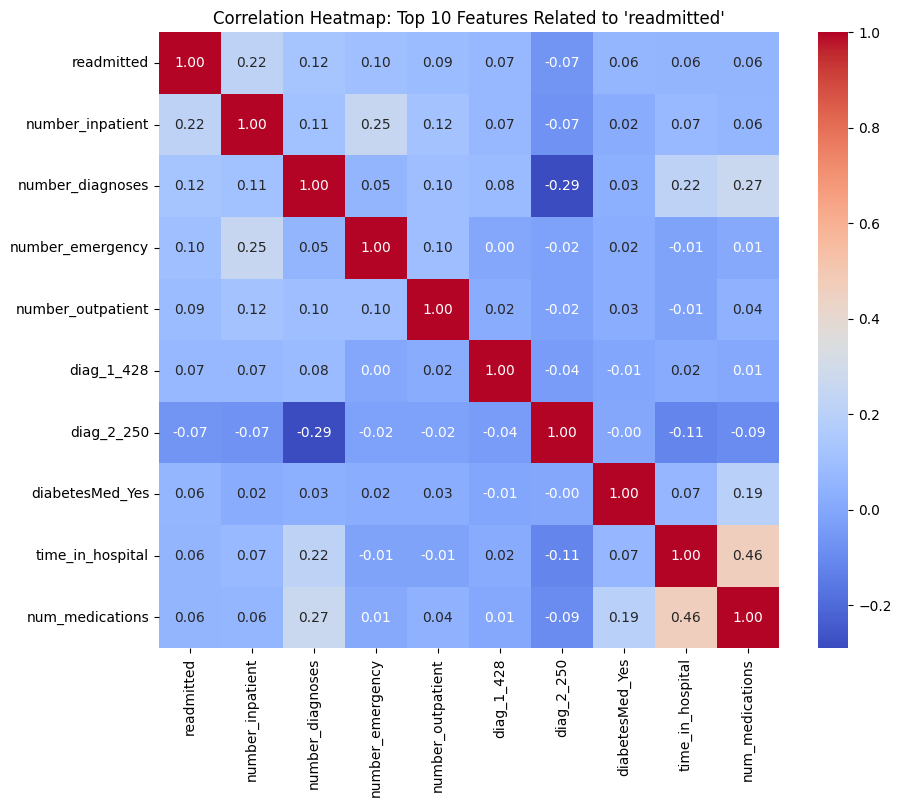

In [ ]:
# 3. Detailed Heatmap: Focus on top 10 correlated features
top_features = correlations['readmitted'].abs().sort_values(ascending=False).head(10).index
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features].corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap: Top 10 Features Related to 'readmitted'")
plt.show()

<ipython-input-11-20decc7235bd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='readmitted', y=feature, data=df, palette='muted', split=True)


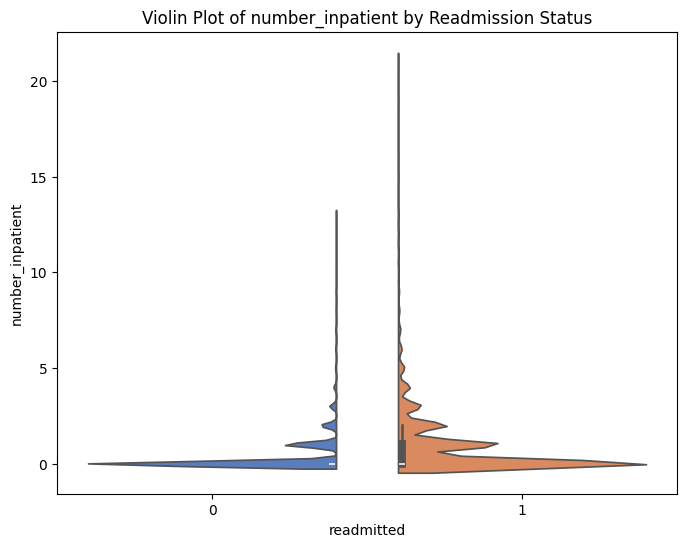

<ipython-input-11-20decc7235bd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='readmitted', y=feature, data=df, palette='muted', split=True)


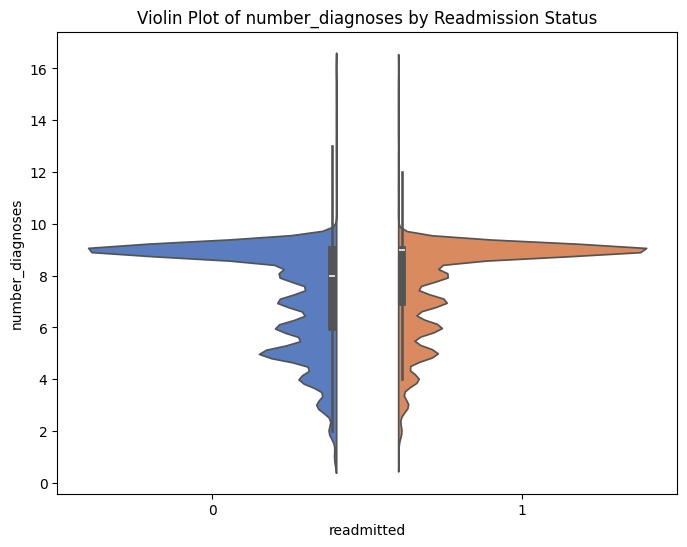

<ipython-input-11-20decc7235bd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='readmitted', y=feature, data=df, palette='muted', split=True)


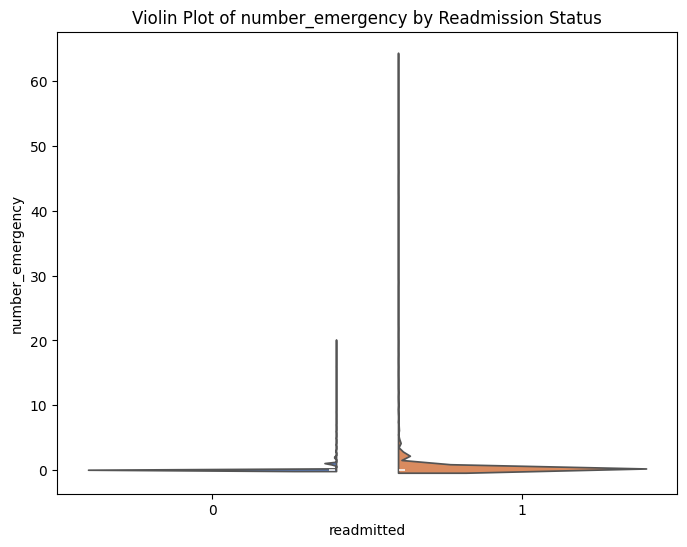

<ipython-input-11-20decc7235bd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='readmitted', y=feature, data=df, palette='muted', split=True)


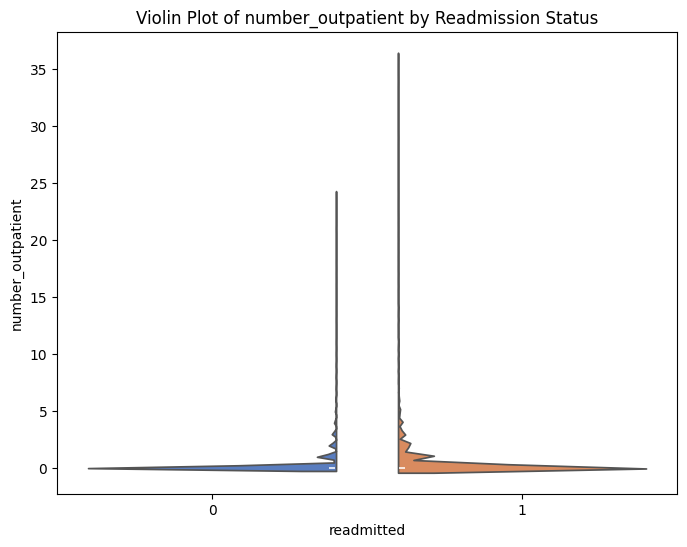

<ipython-input-11-20decc7235bd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='readmitted', y=feature, data=df, palette='muted', split=True)


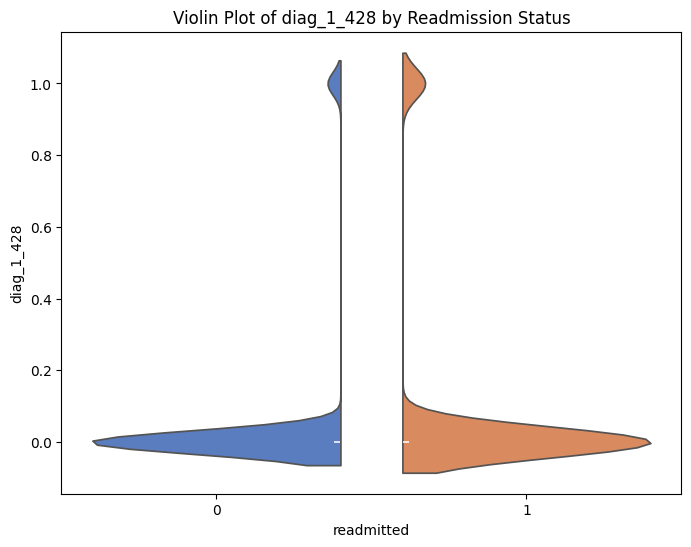

<ipython-input-11-20decc7235bd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='readmitted', y=feature, data=df, palette='muted', split=True)


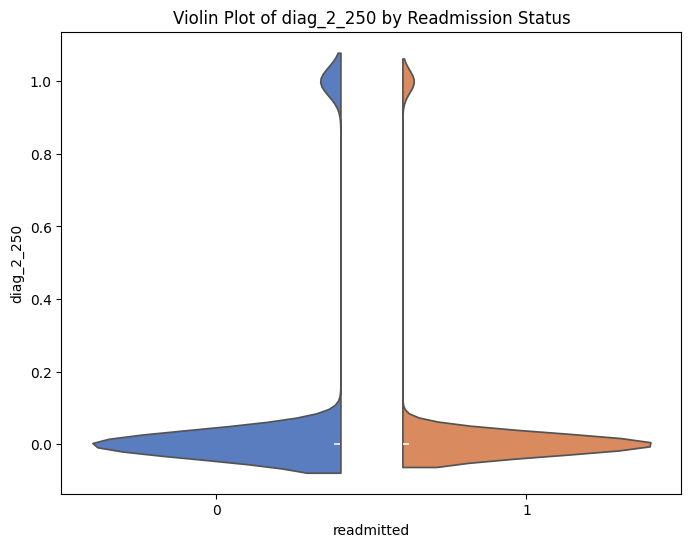

<ipython-input-11-20decc7235bd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='readmitted', y=feature, data=df, palette='muted', split=True)


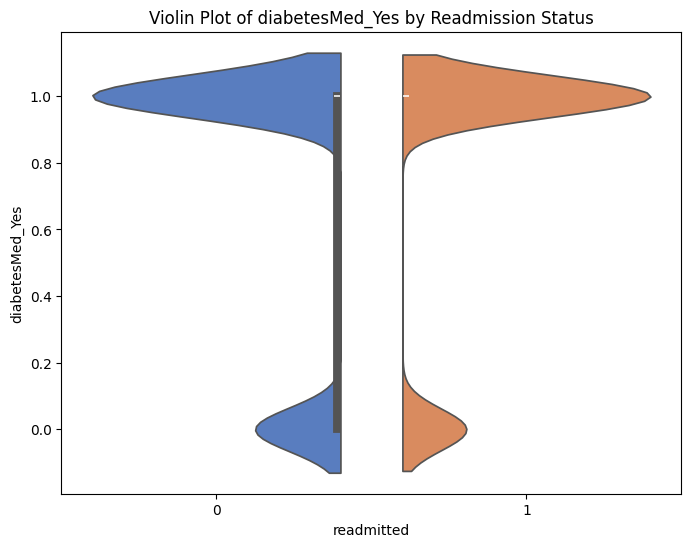

<ipython-input-11-20decc7235bd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='readmitted', y=feature, data=df, palette='muted', split=True)


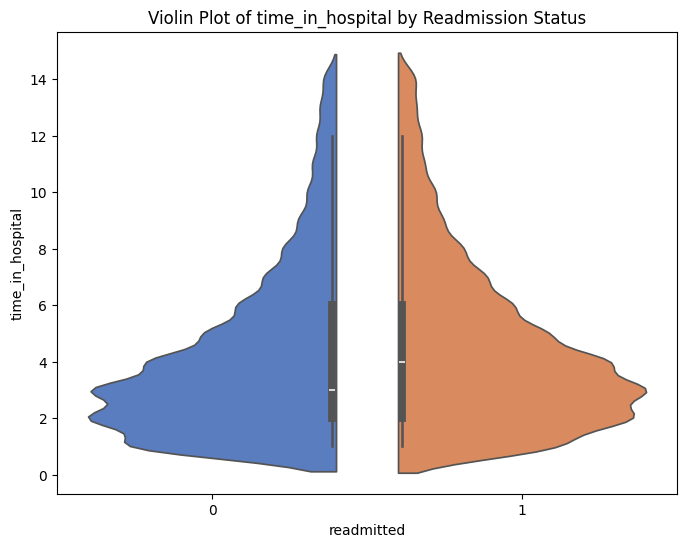

<ipython-input-11-20decc7235bd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='readmitted', y=feature, data=df, palette='muted', split=True)


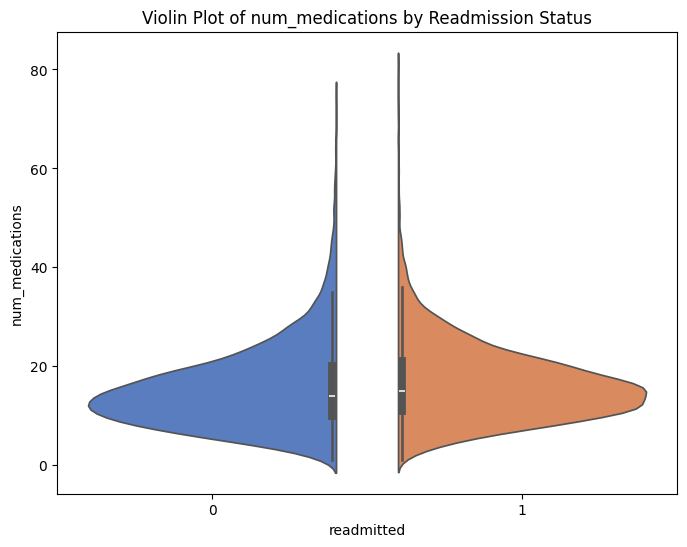

In [ ]:
# 4. Violin/Boxplot: Explore distribution of top features
import warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Suppress warnings

for feature in top_features:
    if feature != 'readmitted':
        plt.figure(figsize=(8, 6))
        sns.violinplot(x='readmitted', y=feature, data=df, palette='muted', split=True)
        plt.title(f"Violin Plot of {feature} by Readmission Status")
        plt.show()


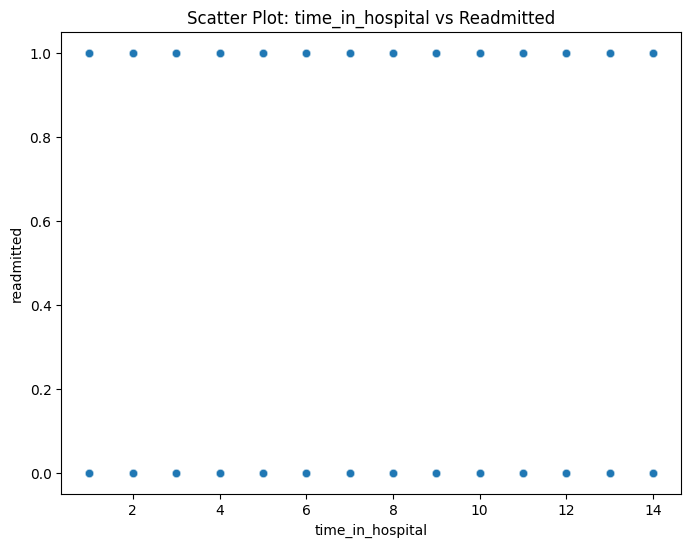

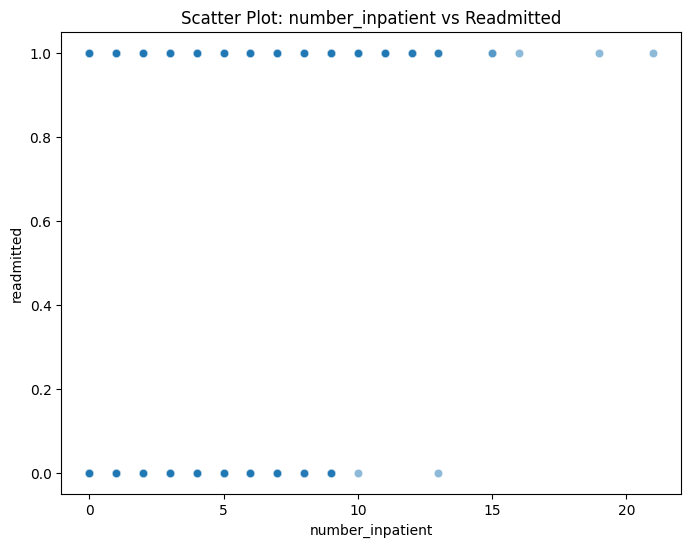

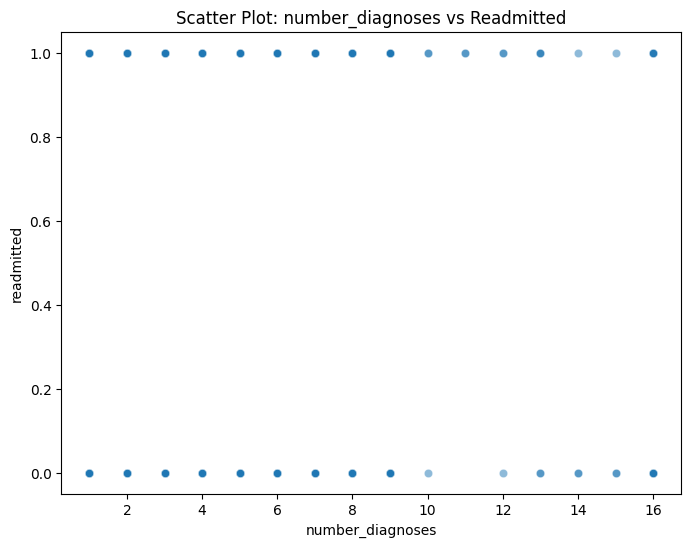

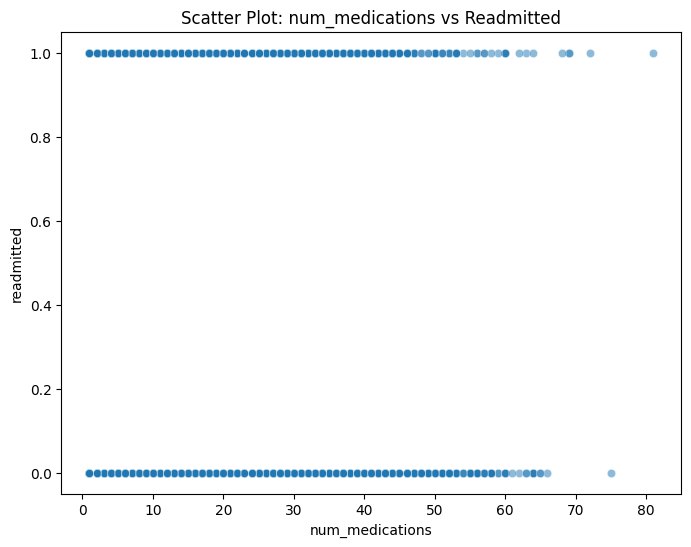

In [ ]:
# 5. Scatter Plots for Continuous Features
continuous_features = ['time_in_hospital', 'number_inpatient', 'number_diagnoses', 'num_medications']
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='readmitted', data=df, alpha=0.5)
    plt.title(f"Scatter Plot: {feature} vs Readmitted")
    plt.show()


In [ ]:
# 6. Correlation Analysis for Subgroups (e.g., gender-based correlations)
for gender in df['gender_Female'].unique():
    subset = df[df['gender_Female'] == gender]
    subset_corr = subset.corr()['readmitted'].sort_values(ascending=False)
    print(f"\nCorrelations for Gender {'Female' if gender == 1 else 'Male'}:\n", subset_corr.head(5))


Correlations for Gender Male:
 readmitted           1.000000
number_inpatient     0.211901
number_diagnoses     0.130112
number_emergency     0.114683
number_outpatient    0.097189
Name: readmitted, dtype: float64

Correlations for Gender Female:
 readmitted           1.000000
number_inpatient     0.219895
number_diagnoses     0.117330
number_emergency     0.095258
number_outpatient    0.078136
Name: readmitted, dtype: float64


In [ ]:
print(df.columns)

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_Caucasian',
       'race_AfricanAmerican', 'gender_Female', 'age_[70-80)', 'age_[60-70)',
       'age_[50-60)', 'age_[80-90)', 'age_[40-50)', 'payer_code_?',
       'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC',
       'medical_specialty_?', 'medical_specialty_InternalMedicine',
       'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414',
       'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427',
       'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428',
       'max_glu_serum_None', 'A1Cresult_None', 'metformin_No',
       'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No',
       'glimepiride_No', 'acetohexamide_No', 'glipizide_No', 'glyburide_No',
     

In [ ]:
# Check for columns that might represent age
print(df.head())  # Display the first few rows of the dataset


   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                14                  41               0               11   
1                 2                  30               0               12   
2                 5                  66               0               22   
3                 3                  63               0                8   
4                 5                  40               0                6   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  \
0                  0                 0                 0                 6   
1                  0                 0                 1                 9   
2                  1                 0                 2                 9   
3                  0                 0                 0                 8   
4                  0                 0                 1                 9   

   race_Caucasian  race_AfricanAmerican  ...  citoglipton_No  insulin_No  

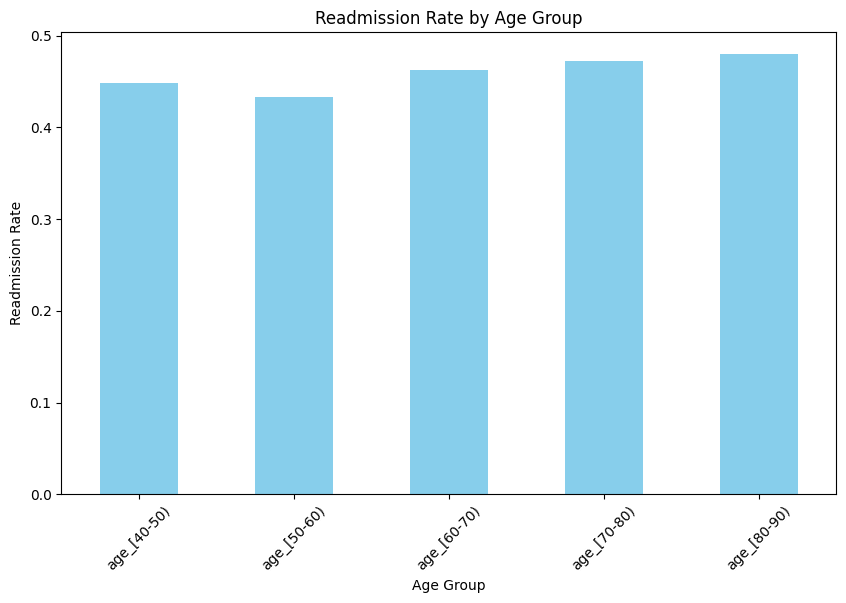

In [ ]:
import matplotlib.pyplot as plt

# Age group columns
age_groups = ['age_[70-80)', 'age_[60-70)', 'age_[50-60)', 'age_[80-90)', 'age_[40-50)']

# Calculating readmission rates for each age group
readmission_by_age_group = df[age_groups + ['readmitted']].melt(
    id_vars='readmitted',
    value_vars=age_groups,
    var_name='Age_Group',
    value_name='In_Age_Group'
)

# Filtering for rows where the patient belongs to the age group
readmission_by_age_group = readmission_by_age_group[readmission_by_age_group['In_Age_Group'] == 1]

# Calculating the mean readmission rate for each age group
age_group_readmission_rate = readmission_by_age_group.groupby('Age_Group')['readmitted'].mean().sort_index()

# Plotting the results
plt.figure(figsize=(10, 6))
age_group_readmission_rate.plot(kind='bar', color='skyblue')
plt.title('Readmission Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Readmission Rate')
plt.xticks(rotation=45)
plt.show()


1. Improved Patient Care

To highlight how identifying high-risk patients improves patient care, we can calculate the proportion of patients classified as high risk and visualize their readmission rates.

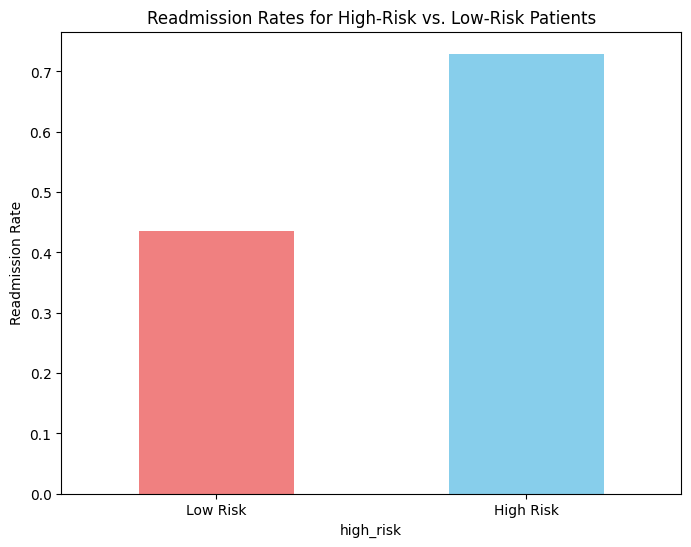

In [ ]:
# Define high-risk patients based on number of inpatient visits
df['high_risk'] = df['number_inpatient'] > 2

# Calculate readmission rates for high-risk and low-risk patients
risk_readmission_rate = df.groupby('high_risk')['readmitted'].mean()

# Visualization
plt.figure(figsize=(8, 6))
risk_readmission_rate.plot(kind='bar', color=['lightcoral', 'skyblue'], legend=False)
plt.title('Readmission Rates for High-Risk vs. Low-Risk Patients')
plt.xticks(ticks=[0, 1], labels=['Low Risk', 'High Risk'], rotation=0)
plt.ylabel('Readmission Rate')
plt.show()


2. Cost Reduction

To demonstrate cost implications, calculate the average hospital stay length or number of procedures for patients who are readmitted versus not readmitted.

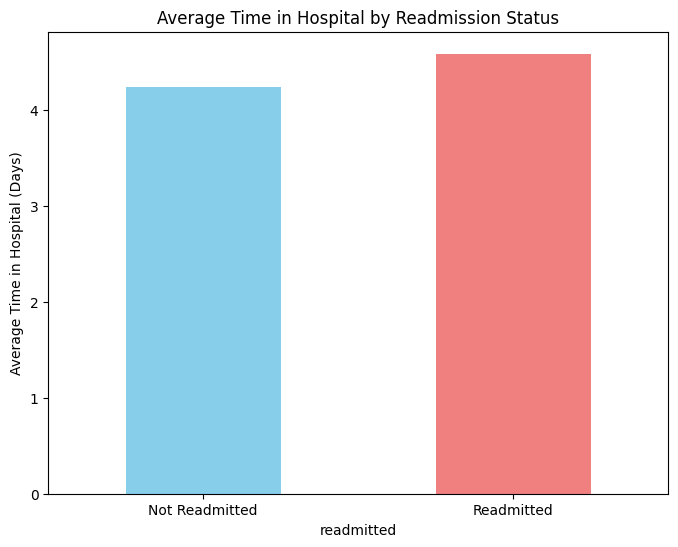

In [ ]:
# Calculate average number of inpatient days for readmitted vs. non-readmitted patients
avg_days_by_readmission = df.groupby('readmitted')['time_in_hospital'].mean()

# Visualization
plt.figure(figsize=(8, 6))
avg_days_by_readmission.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Time in Hospital by Readmission Status')
plt.xticks(ticks=[0, 1], labels=['Not Readmitted', 'Readmitted'], rotation=0)
plt.ylabel('Average Time in Hospital (Days)')
plt.show()


3. Better Long-term Outcomes

To link interventions with long-term health outcomes, analyze trends in patients who received diabetes medication (or other treatments) versus those who did not.

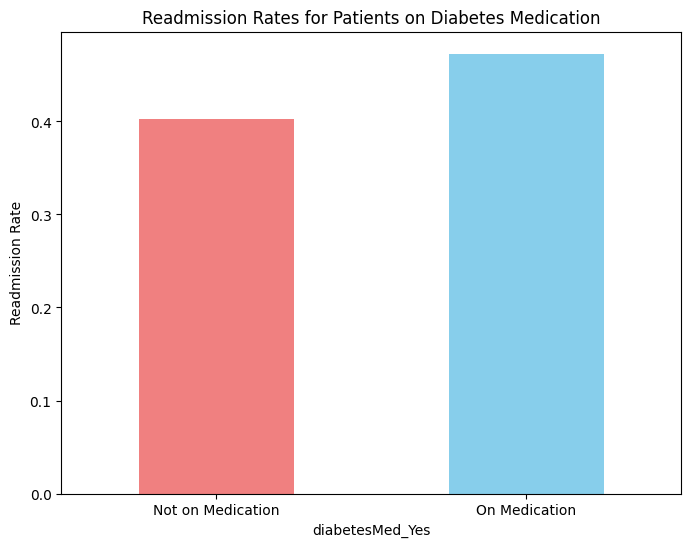

In [ ]:
# Analyze readmission rates for patients on diabetes medication vs. not
diabetes_med_readmission = df.groupby('diabetesMed_Yes')['readmitted'].mean()

# Visualization
plt.figure(figsize=(8, 6))
diabetes_med_readmission.plot(kind='bar', color=['lightcoral', 'skyblue'])
plt.title('Readmission Rates for Patients on Diabetes Medication')
plt.xticks(ticks=[0, 1], labels=['Not on Medication', 'On Medication'], rotation=0)
plt.ylabel('Readmission Rate')
plt.show()


In [ ]:
# Prepare the data for machine learning
X = df.drop('readmitted', axis=1)  # Features
y = df['readmitted']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict the test set results
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6182
Confusion Matrix:
 [[2002  729]
 [1180 1089]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.73      0.68      2731
           1       0.60      0.48      0.53      2269

    accuracy                           0.62      5000
   macro avg       0.61      0.61      0.61      5000
weighted avg       0.62      0.62      0.61      5000



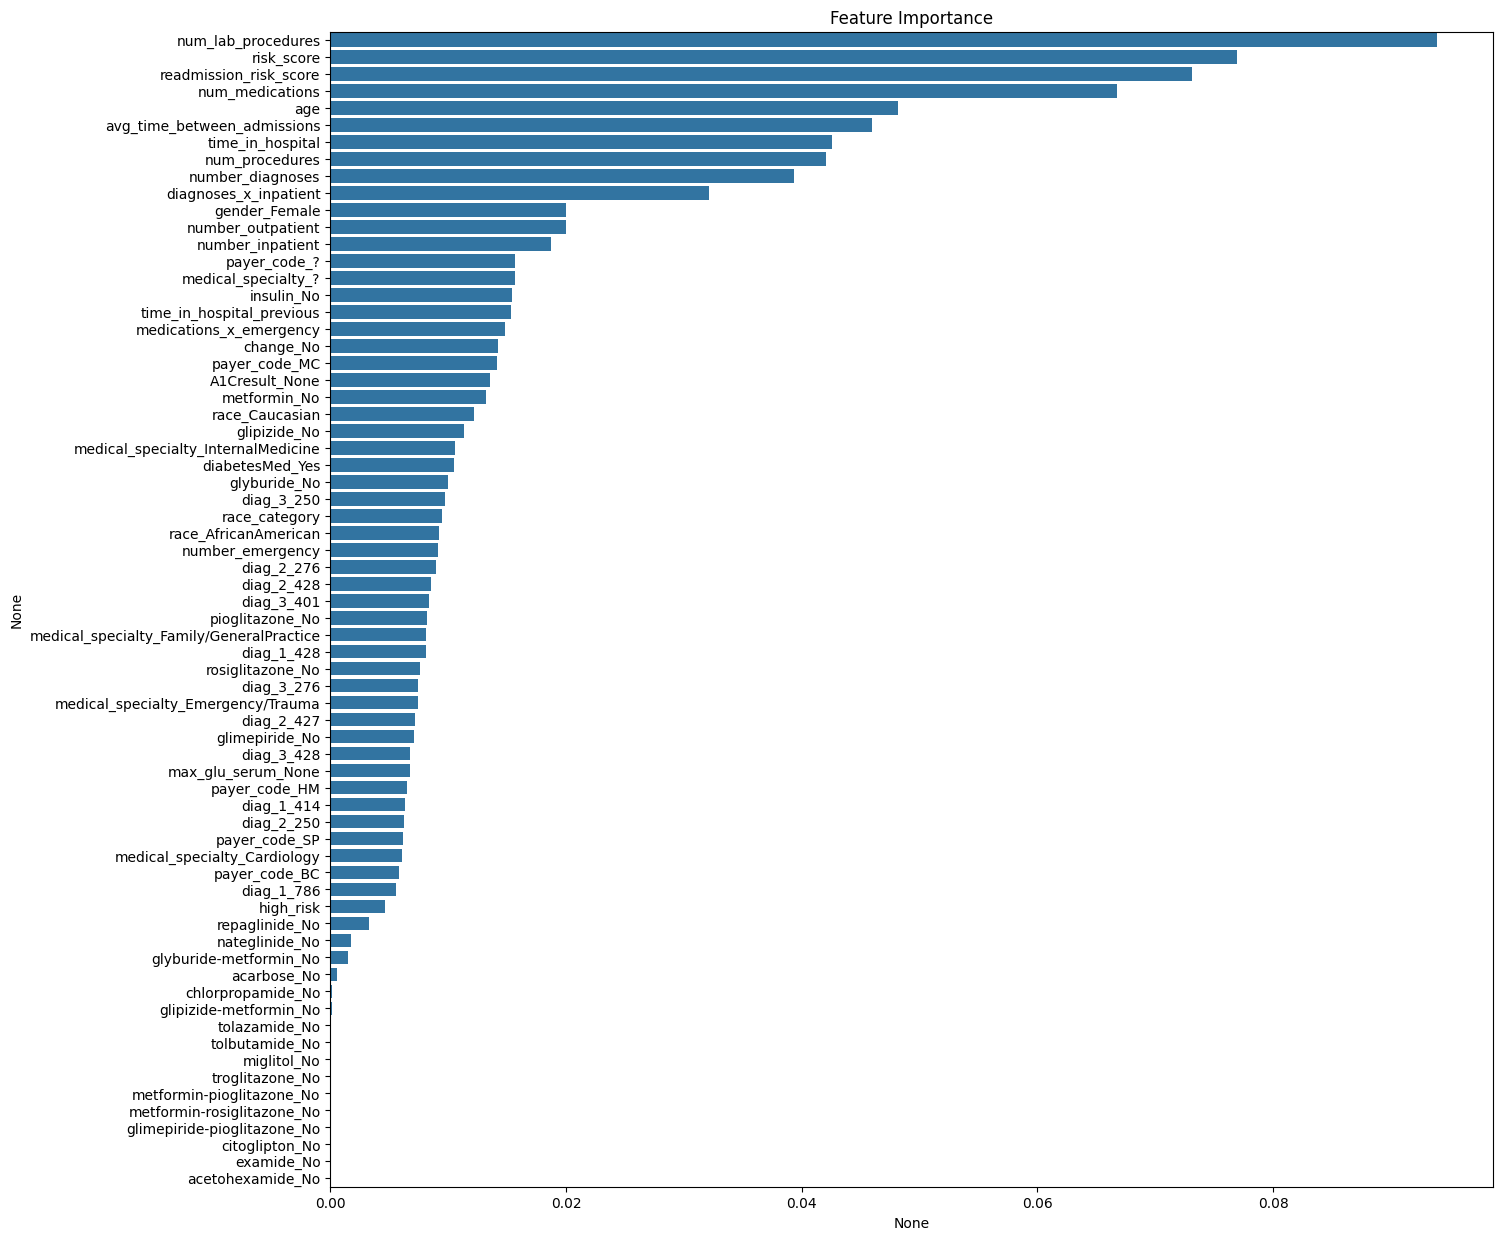

In [ ]:
# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(15, 15))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importance')
plt.show()

1. Time-Based Features

(a) Time since the last hospital admission
Assuming you have admission_date and patient_id columns:

Adjusting Code for Time-Based Features

If there is no admission_date, we will skip time-based calculations or infer them indirectly based on available data like number_inpatient, number_emergency, and time_in_hospital.

1. Time Since Last Admission
Without admission_date, this feature cannot be computed. Instead, we can focus on other available temporal features.

2. Average Time Between Admissions
Use cumulative counts of inpatient visits as a proxy:

In [ ]:
# Assuming 'number_inpatient' tracks cumulative inpatient visits
df['avg_time_between_admissions'] = df['time_in_hospital'] / (df['number_inpatient'] + 1)


3. Time in Hospital During Previous Admissions


In [ ]:
# Approximation using cumulative inpatient count
df['time_in_hospital_previous'] = df['time_in_hospital'] * (df['number_inpatient'] - 1)
df['time_in_hospital_previous'] = df['time_in_hospital_previous'].clip(lower=0)  # Ensure no negatives

Updated Risk Score

The risk score can include available demographic and hospital visit information:



In [ ]:
# Example: Refined risk score based on available data
df['risk_score'] = (
    0.4 * df['number_inpatient'] +
    0.3 * df['number_emergency'] +
    0.2 * df['num_medications'] +
    0.1 * df['time_in_hospital']
)


Interaction Terms

We can still compute interactions using available features:

In [ ]:
# Interaction between number of diagnoses and inpatient visits
df['diagnoses_x_inpatient'] = df['number_diagnoses'] * df['number_inpatient']

# Interaction between medication count and emergency visits
df['medications_x_emergency'] = df['num_medications'] * df['number_emergency']


Categorical Variables

If admission_type and discharge_disposition are unavailable, check the dataset for other categorical columns to encode:


In [ ]:
# Example: Mapping race categories to numerical values
race_mapping = {
    'race_Caucasian': 1,
    'race_AfricanAmerican': 2,
    # Add other race categories if available
}
df['race_category'] = df[[col for col in df.columns if col.startswith('race_')]].idxmax(axis=1)
df['race_category'] = df['race_category'].map(race_mapping)


Verification
After applying the updated transformations:

In [ ]:
print(df[['avg_time_between_admissions', 'time_in_hospital_previous',
          'risk_score', 'diagnoses_x_inpatient', 'medications_x_emergency']].head())


   avg_time_between_admissions  time_in_hospital_previous  risk_score  \
0                    14.000000                          0         3.6   
1                     1.000000                          0         3.0   
2                     1.666667                          5         5.7   
3                     3.000000                          0         1.9   
4                     2.500000                          0         2.1   

   diagnoses_x_inpatient  medications_x_emergency  
0                      0                        0  
1                      9                        0  
2                     18                        0  
3                      0                        0  
4                      9                        0  


In [ ]:
import re

# Convert age categories to numeric midpoints
def extract_midpoint(age_range):
    match = re.search(r'\[(\d+)-(\d+)\)', age_range)
    if match:
        return (int(match.group(1)) + int(match.group(2))) / 2
    return None

# Combine age category columns into a single numeric column
age_columns = [col for col in df.columns if col.startswith('age_')]
df['age'] = sum(df[col] * extract_midpoint(col) for col in age_columns)

# Drop original age category columns
df.drop(columns=age_columns, inplace=True)

# Create a readmission risk score using existing features
df['readmission_risk_score'] = (
    df['time_in_hospital'] +
    df['number_inpatient'] * 2 +
    df['number_emergency'] +
    df['num_medications'] * 0.5
)

# Define features and target
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Pipeline with Random Forest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train model
pipeline.fit(X_train, y_train)

# Evaluate model
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.71      0.66      2718
           1       0.59      0.49      0.53      2282

    accuracy                           0.61      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.61      0.61      0.60      5000

ROC AUC Score: 0.6434614982790744


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200, 500],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 500}


In [ ]:
feature_importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = numeric_features.tolist() + list(
    pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
)
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)


                       Feature  Importance
1           num_lab_procedures    0.092990
61                  risk_score    0.077296
66      readmission_risk_score    0.074415
3              num_medications    0.065631
65                         age    0.047651
..                         ...         ...
50              citoglipton_No    0.000000
49                  examide_No    0.000000
39            acetohexamide_No    0.000000
56   metformin-pioglitazone_No    0.000000
55  metformin-rosiglitazone_No    0.000000

[69 rows x 2 columns]


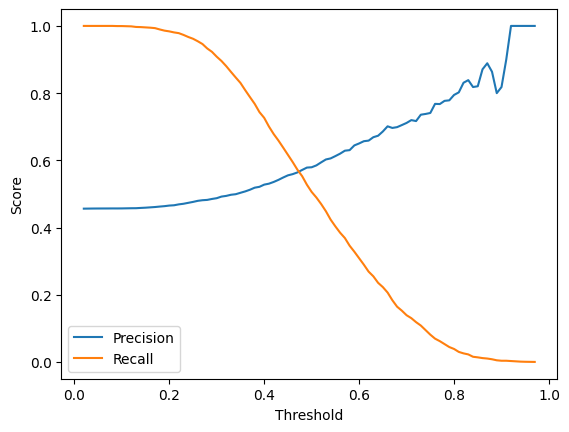

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validated ROC AUC:", scores.mean())


Cross-Validated ROC AUC: 0.6549871736996441


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define models
models = {
    "Gradient Boosting Machine": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Iterate through models and evaluate
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Train model
    pipeline.fit(X_train, y_train)

    # Predict
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # Evaluate performance
    print(f"\n{name}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))



Gradient Boosting Machine
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.75      0.68      2718
           1       0.61      0.47      0.53      2282

    accuracy                           0.62      5000
   macro avg       0.62      0.61      0.61      5000
weighted avg       0.62      0.62      0.61      5000

ROC AUC Score: 0.6651783900493932

XGBoost
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.67      0.64      2718
           1       0.56      0.50      0.53      2282

    accuracy                           0.59      5000
   macro avg       0.59      0.59      0.59      5000
weighted avg       0.59      0.59      0.59      5000

ROC AUC Score: 0.6418151396313343


Hyperparameter Tuning for GBM and XGBoost

To improve performance further, apply hyperparameter tuning:

GBM Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_gbm = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

grid_search_gbm = GridSearchCV(pipeline, param_grid_gbm, cv=5, scoring='roc_auc')
grid_search_gbm.fit(X_train, y_train)

print("Best Parameters for GBM:", grid_search_gbm.best_params_)


Best Parameters for GBM: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}


XGBoost Hyperparameter Tuning



In [ ]:
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(pipeline, param_grid_xgb, cv=5, scoring='roc_auc')
grid_search_xgb.fit(X_train, y_train)

print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

Best Parameters for XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Confirm the new class distribution
from collections import Counter
print("Class Distribution After SMOTE:", Counter(y_resampled))


Class Distribution After SMOTE: Counter({0: 10859, 1: 10859})


In [ ]:
df['diagnoses_x_time_in_hospital'] = df['number_diagnoses'] * df['time_in_hospital']
df['medications_x_emergency_visits'] = df['num_medications'] * df['number_emergency']
df['inpatient_x_risk_score'] = df['number_inpatient'] * df['risk_score']


In [ ]:
df['combined_risk'] = df['risk_score'] + df['readmission_risk_score']


In [ ]:
# Example: Group by age category to calculate mean readmission risk
age_group_risk = df.groupby('age')['readmission_risk_score'].mean().reset_index()
print(age_group_risk)


    age  readmission_risk_score
0   0.0               12.157041
1  45.0               13.770799
2  55.0               13.838310
3  65.0               14.364768
4  75.0               14.174916
5  85.0               13.833451


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train an XGBoost model with balanced class weights
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb_model.fit(X_resampled, y_resampled)

# Evaluate on test data
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.60      0.62      2731
           1       0.55      0.60      0.58      2269

    accuracy                           0.60      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.60      0.60      0.60      5000

ROC AUC Score: 0.6379451828644528


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Class Distribution After SMOTE:", Counter(y_resampled))


Class Distribution After SMOTE: Counter({0: 10859, 1: 10859})


In [ ]:
# Calculate class weights
class_weights = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=class_weights)


Hyperparameter Optimization

GridSearchCV for Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                           param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_resampled, y_resampled)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


Threshold Tuning

Precision-Recall Curve and Adjust Threshold

In [ ]:
xgb_model.fit(X_resampled, y_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_resampled, y_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_prob = xgb_model.predict_proba(X_test)[:, 1]


In [ ]:
print("Model fitted:", hasattr(xgb_model, 'feature_importances_'))


Model fitted: True


In [ ]:
print(X_resampled.shape, X_test.shape)


(21718, 68) (5000, 68)


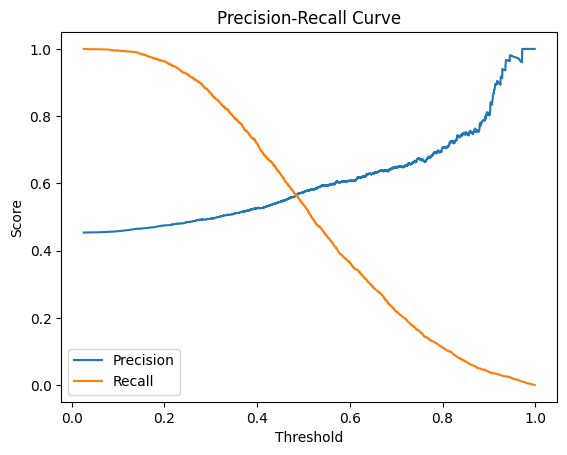

Optimal Threshold: 0.13906224


In [ ]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Predict probabilities
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
import matplotlib.pyplot as plt
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall Curve')
plt.show()

# Adjust threshold
optimal_threshold = thresholds[np.argmax(precision + recall)]
print("Optimal Threshold:", optimal_threshold)

# Apply new threshold
y_pred_adjusted = (y_prob >= optimal_threshold).astype(int)

Alternative Models

LightGBM Implementation

In [ ]:
from lightgbm import LGBMClassifier

# Train LightGBM model
lgbm_model = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm_model.fit(X_resampled, y_resampled)

# Evaluate on test data
y_pred_lgbm = lgbm_model.predict(X_test)
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgbm))
print("LightGBM ROC AUC Score:", roc_auc_score(y_test, y_prob_lgbm))


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 10859, number of negative: 10859
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 21718, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.69      0.66      2731
           1       0.58      0.53      0.56      2269

    accuracy                           0.62      5000
   macro avg       0.61      0.61      0.61      5000
weighted avg       0.61      0.62      0.61      5000

LightGBM ROC AUC Score: 0.6543978114587601


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Create base models
base_models = [
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42))
]

# Create stacking model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_model.fit(X_resampled, y_resampled)

# Evaluate stacking model
y_pred_stack = stacking_model.predict(X_test)
y_prob_stack = stacking_model.predict_proba(X_test)[:, 1]

print("Stacking Model Classification Report:\n", classification_report(y_test, y_pred_stack))
print("Stacking Model ROC AUC Score:", roc_auc_score(y_test, y_prob_stack))


[LightGBM] [Info] Number of positive: 10859, number of negative: 10859
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 21718, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 8687, number of negative: 8687
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1308
[LightGBM] [Info] Number of data points in the train set: 17374, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000

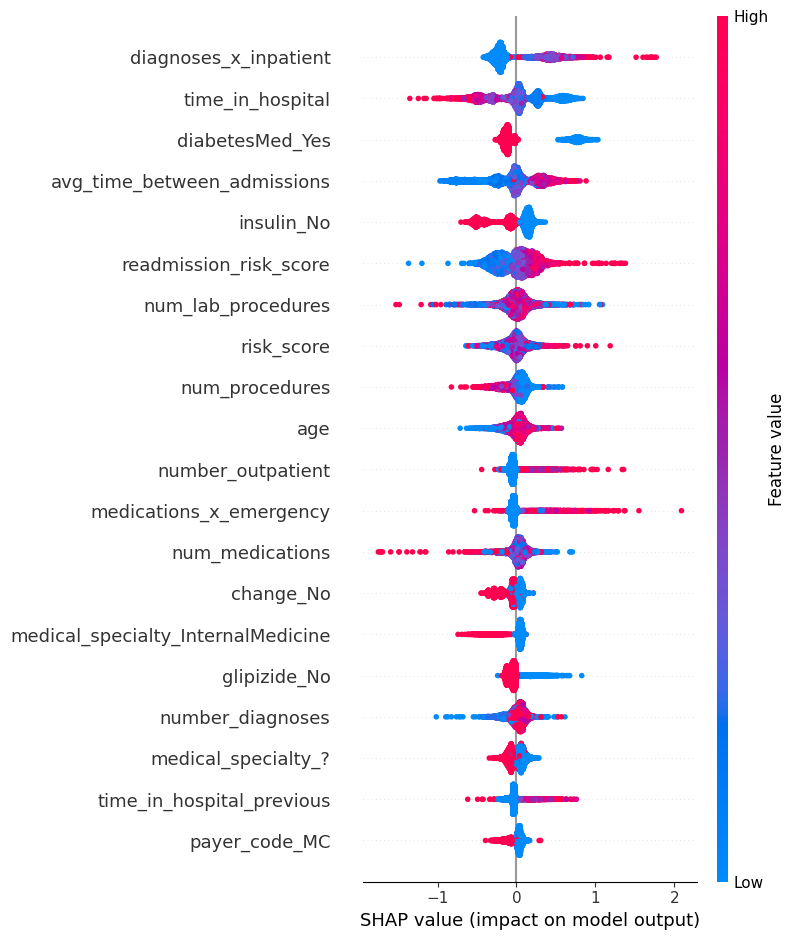

In [ ]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

# Force plot for a single prediction
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


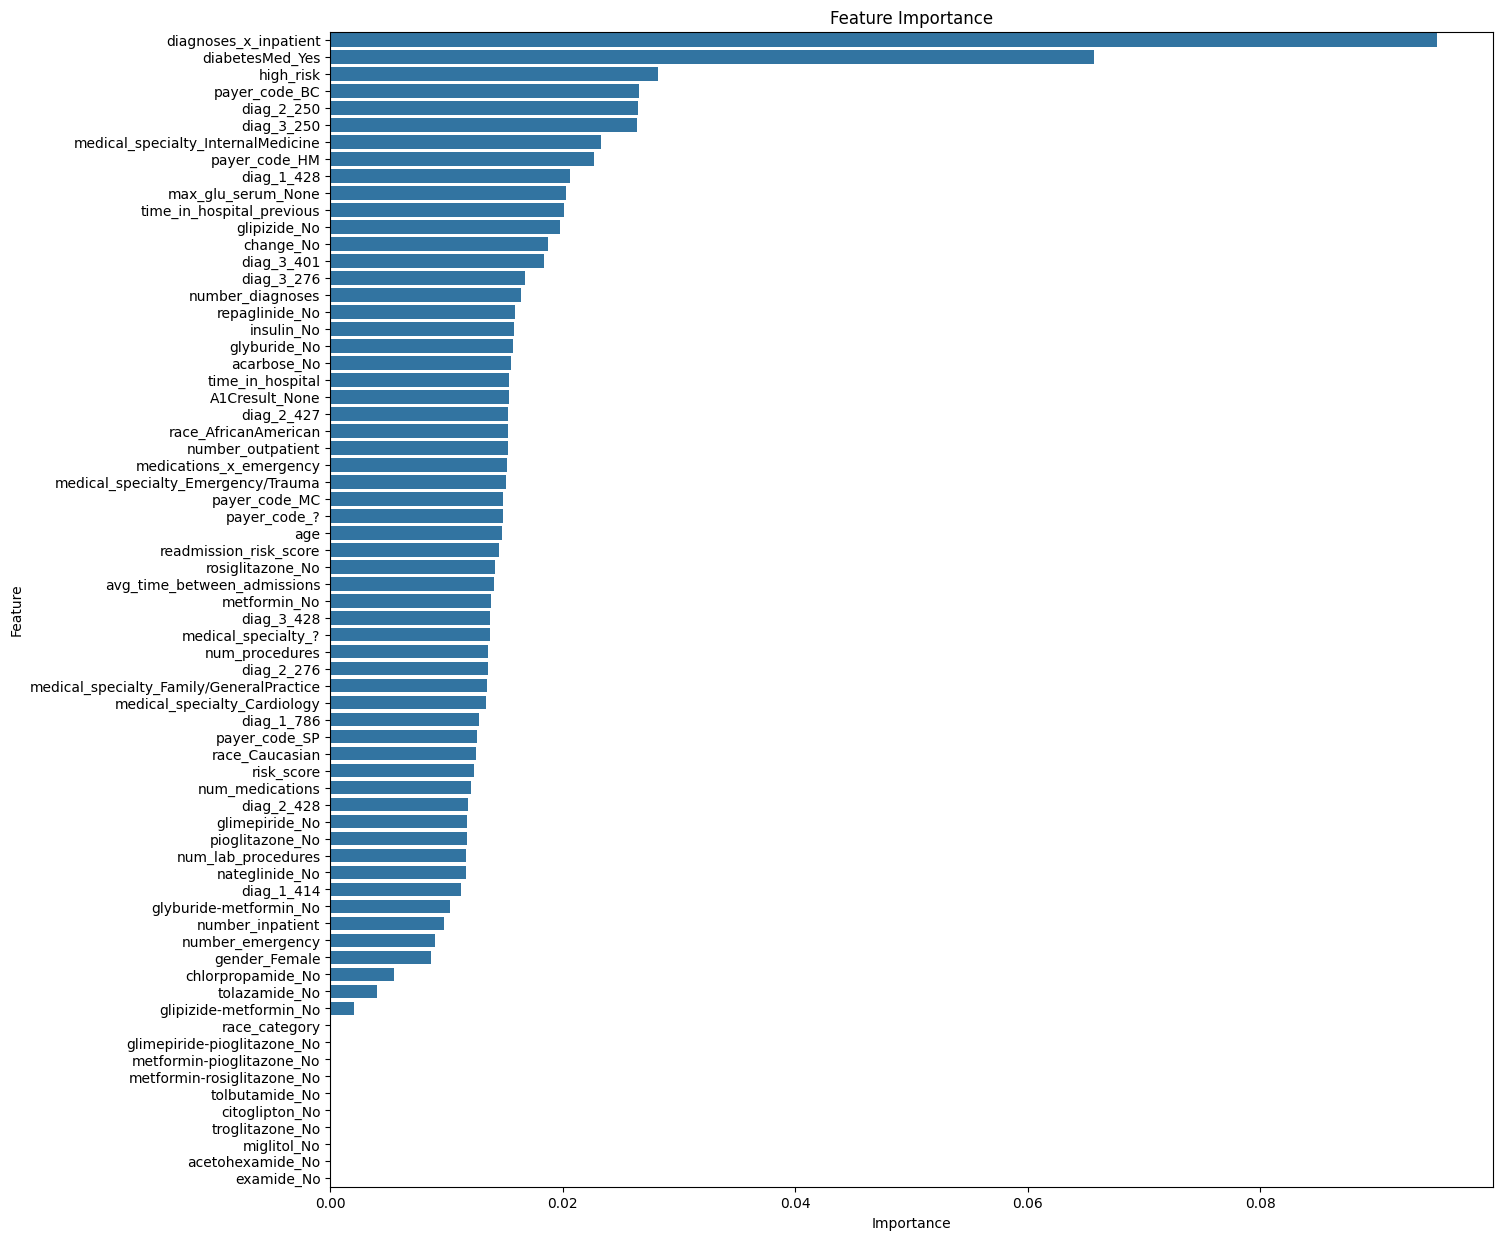

In [ ]:
import seaborn as sns

# Feature importance from XGBoost
importances = xgb_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(15, 15))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(xgb_model, X_resampled, y_resampled, cv=5, scoring='roc_auc')
print("Cross-Validated ROC AUC:", scores.mean())


Cross-Validated ROC AUC: 0.6487638686502117
